In [16]:
import pandas as pd
import matplotlib.pyplot as plt

## Data wrangling and EDA

### a. Import datasets

In [3]:
grc_df = pd.read_csv("data/year_msoa_grocery.csv", index_col="area_id")
grc_df["density"] = grc_df.population / grc_df.area_sq_km
grc_df.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,density
area_id,,,,,,,,,,,,,,,,,,,,,
E02000001,323.180804,35.0,150.0,250.0,400.0,1000.0,323.685705,1.001360,98.849228,13.0,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,2305.862069
E02000002,397.651232,32.5,150.0,300.0,500.0,1020.0,550.434424,6.030232,118.288417,11.0,...,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704,3416.203704
E02000003,371.276702,30.0,140.0,250.0,450.0,1200.0,564.404826,4.398728,118.385615,12.0,...,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794,5009.345794
E02000004,347.481292,29.0,126.0,250.0,430.0,1000.0,479.372575,5.297349,104.435407,11.0,...,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871,2635.483871
E02000005,400.576688,32.5,150.0,296.0,500.0,1050.0,593.021809,5.107669,128.997438,11.0,...,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891,7767.226891


In [4]:
inc_df = pd.read_excel("data/ons-model-based-income-estimates-msoa.xls",
                       sheet_name="2015-16 (annual income)",
                       index_col="MSOA code")
inc_df.head()

,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),Net annual income (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
MSOA code,,,,,,,,,,,,,,,,,,,,,
E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,35900,45200,28500,16700,27300,...,22100,11700,27600,33300,22800,10400,25600,31000,21200,9800
E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,42500,53600,33700,19900,29800,...,23900,13100,28600,34500,23700,10800,27500,33200,22700,10500
E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,38000,47700,30200,17600,28300,...,22800,12300,28200,34100,23400,10700,26700,32300,22100,10200
E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,33500,42200,26700,15500,26600,...,21600,11200,25500,30800,21100,9700,22400,27100,18500,8700
E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,31700,39800,25200,14600,25500,...,20700,10800,25100,30200,20800,9500,20900,25300,17200,8000


### b. Exploration of the income dataset

In [5]:
inc_df.columns

Index(['MSOA name', 'Local authority code', 'Local authority name',
       'Region code', 'Region name', 'Total annual income (£)',
       'Upper confidence limit (£)', 'Lower confidence limit (£)',
       'Confidence interval (£)', 'Net annual income (£)',
       'Upper confidence limit (£).1', 'Lower confidence limit (£).1',
       'Confidence interval (£).1', 'Net income before housing costs (£)',
       'Upper confidence limit (£).2', 'Lower confidence limit (£).2',
       'Confidence interval (£).2', 'Net income after housing costs (£)',
       'Upper confidence limit (£).3', 'Lower confidence limit (£).3',
       'Confidence interval (£).3'],
      dtype='object')

The values that we have access to, with there confidence intervals, are:
- Total annual income
- Net annual income
- Net income before housing costs
- Net income after housing costs

In [6]:
# Rename columns to suppress the '£' character
col_names = ['MSOA name', 'Local authority code', 'Local authority name',
       'Region code', 'Region name', 'Total annual income',
       'Upper confidence limit', 'Lower confidence limit',
       'Confidence interval', 'Net annual income',
       'Upper confidence limit.1', 'Lower confidence limit.1',
       'Confidence interval.1', 'Net income before housing costs',
       'Upper confidence limit.2', 'Lower confidence limit.2',
       'Confidence interval.2', 'Net income after housing costs',
       'Upper confidence limit.3', 'Lower confidence limit.3',
       'Confidence interval.3']
inc_df.columns = col_names

In [7]:
# Number of different local authorities
inc_df["Local authority name"].unique().shape[0]

348

In [8]:
# Number of different regions
inc_df["Region name"].unique().shape[0]

10

### c. Join datasets

In [9]:
areas = set(grc_df.index).intersection(set(inc_df.index))
print(f"There are {len(grc_df)} areas in the Tesco dataset.")
print(f"{len(areas)} of them appear in the income dataset.")

There are 983 areas in the Tesco dataset.
983 of them appear in the income dataset.


(The numbers above are good news)

In [10]:
df = grc_df.join(inc_df, how="inner")
df.shape

(983, 223)

### d. EDA

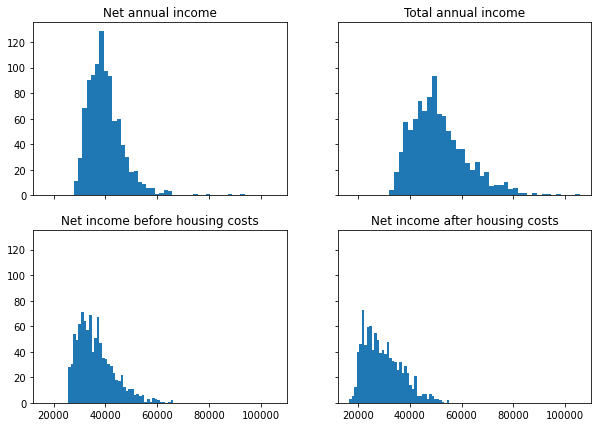

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)
income_types = ["Net annual income", "Total annual income",
                "Net income before housing costs",
                "Net income after housing costs"]
for i in range(4):
    ax = axes[i//2, i%2]
    title = income_types[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=40)
plt.show()

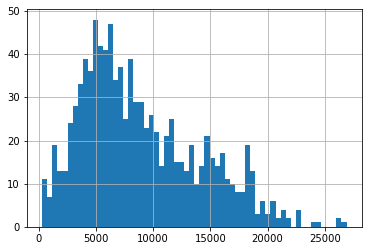

In [35]:
df["density"].hist(bins=60)
plt.show()

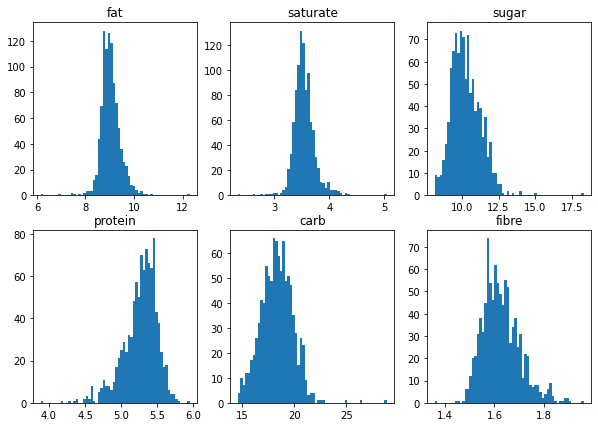

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(10,7))
nutrients = ["fat", "saturate", "sugar", "protein", "carb", "fibre"]
for i in range(6):
    ax = axes[i//3, i%3]
    title = nutrients[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=60)
plt.show()